# Week 3 — Hands-On: Distributions & Variation
**The Shape of Data:** Understanding how data is distributed & why it matters  
**Goals:** Practice univariate distribution visualization, binning rules, KDE, box/violin plots, ECDF, and facet plots.

## Environment Setup

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris

You will encounter issues. How to solve them?

In [33]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (7,4)

# Datasets
iris = load_iris(as_frame=True)
df_iris = iris.frame.copy()
df_iris['species'] = df_iris['target'].map({i: name for i, name in enumerate(iris.target_names)})

gap = px.data.gapminder()  # for optional extensions
df_gap = gap.copy()


In [34]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [35]:
df_gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


## (1) Histograms & Binning
**Task:** Plot a histogram of *Iris sepal length* and experiment with different bin sizes.  
Then compare with Sturges’ Rule and Freedman–Diaconis Rule.

Rules of thumb include:

Sturges’ Rule: bins ≈ log2(n) + 1

Freedman–Diaconis Rule: h = 2 * IQR * n^(-1/3)

The **Freedman–Diaconis** rule suggests a bin width:
$h = 2 \cdot IQR \cdot n^{-1/3}$ ,
where *IQR* is the interquartile range and *n* is the sample size. The number of bins is roughly:
$\lceil (\max - \min) / h \rceil$

In [19]:
# --- Sturges rule for deciding bins ---
def sturges_bins(n):
    return int(np.ceil(????))

In [20]:
# --- Freedman–Diaconis rule for deciding bins ---
def fd_bins(x):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    h = 2 * iqr * (n ** (-1/3))
    return int(np.ceil((x.max() - x.min()) / h)) if h > 0 else 10

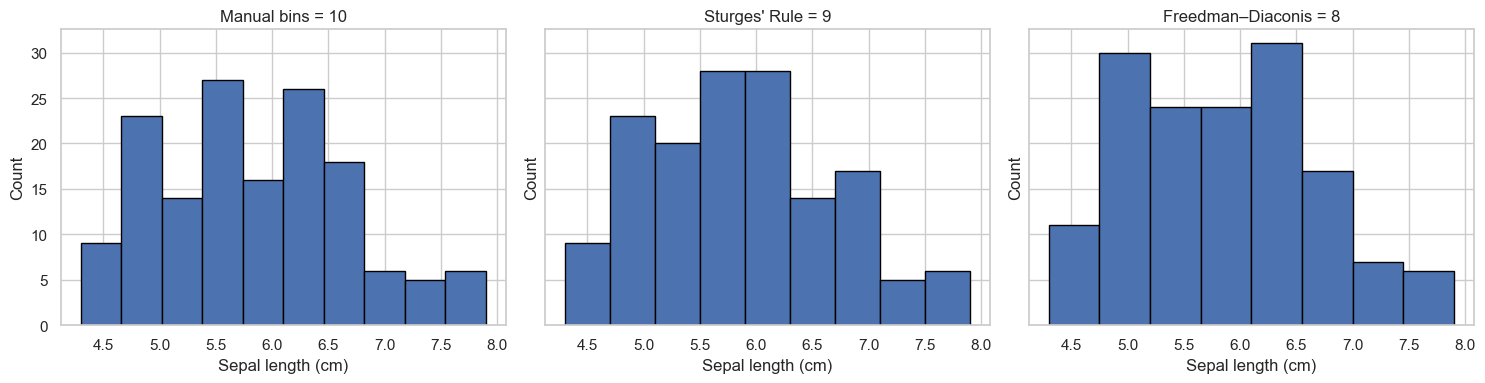

In [21]:
x = df_iris['sepal length (cm)'].values
n = len(x)

bins_manual = 10  # TODO: try 10, 20, 40
bins_sturges = ??
bins_fd = ??

fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

axes[0].hist(x, bins=??, edgecolor='black')
axes[0].set_title(f"Manual bins = {bins_manual}")

axes[1].hist(x, bins=??, edgecolor='black')
axes[1].set_title(f"Sturges' Rule = {bins_sturges}")

axes[2].hist(x, bins=??, edgecolor='black')
axes[2].set_title(f"Freedman–Diaconis = {bins_fd}")
for ax in axes:
    ax.set_xlabel("Sepal length (cm)")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

## (2) KDE vs Histogram  
**Task:** Plot a KDE of *sepal length* and compare it to a histogram. Try different bandwidths with `bw_adjust`.

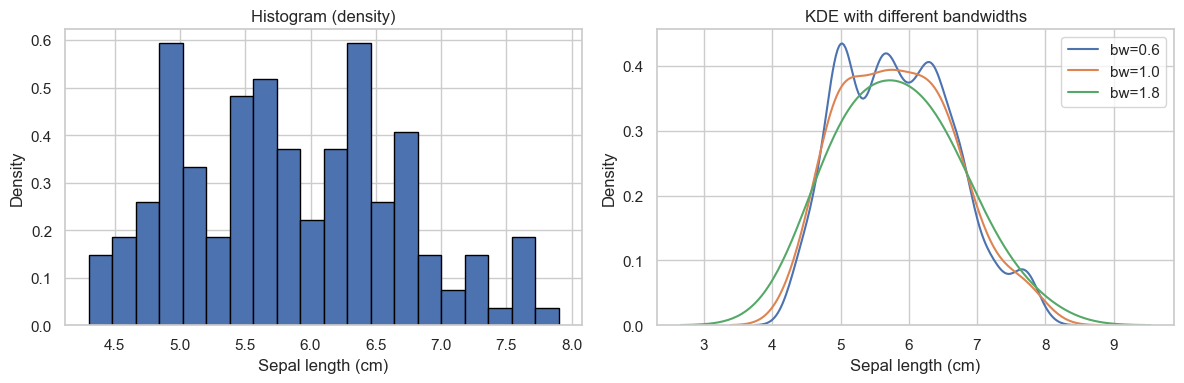

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Histogram
axes[0].hist(x, bins=20, density=True, edgecolor='black')
axes[0].set_title("Histogram (density)")
axes[0].set_xlabel("Sepal length (cm)")
axes[0].set_ylabel("Density")

# KDEs with different bandwidths
for bw in [0.6, 1.0, 1.8]:  # TODO: try different values
    sns.kdeplot(x=x, bw_adjust=bw, ax=axes[1], label=f"bw={bw}")
axes[1].set_title("KDE with different bandwidths")
axes[1].set_xlabel("Sepal length (cm)")
axes[1].legend()

plt.tight_layout()
plt.show()


## (3) Boxplots & Violin Plots (Group Comparisons)
**Task:** Compare *sepal length* across species using boxplots and violin plots.

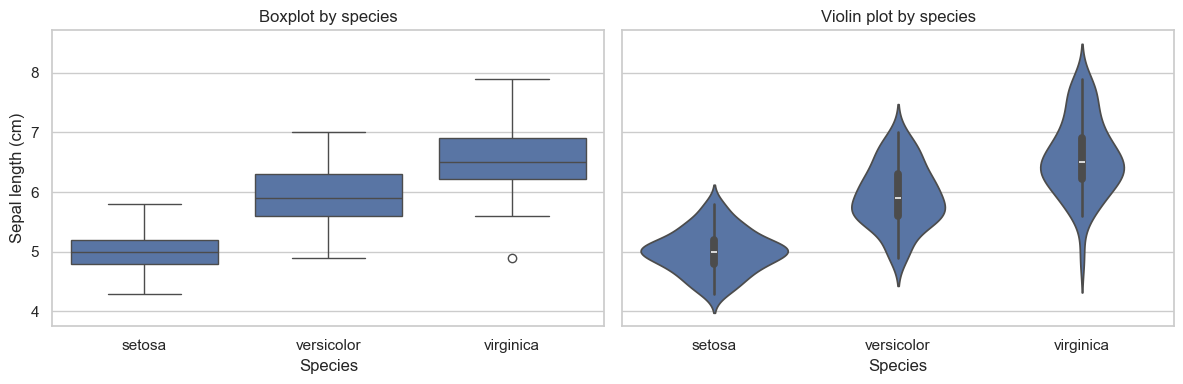

In [24]:

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.boxplot(data=df_iris, x='??', y='??', ax=axes[0])
axes[0].set_title("Boxplot by species")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Sepal length (cm)")

sns.violinplot(data=df_iris, x='??', y='??', inner='box', ax=axes[1])
axes[1].set_title("Violin plot by species")
axes[1].set_xlabel("Species")

plt.tight_layout()
plt.show()


## (4) Outliers & Spread
**Task:** Use boxplots to identify outliers in *sepal width* and explore their effect on mean vs median.


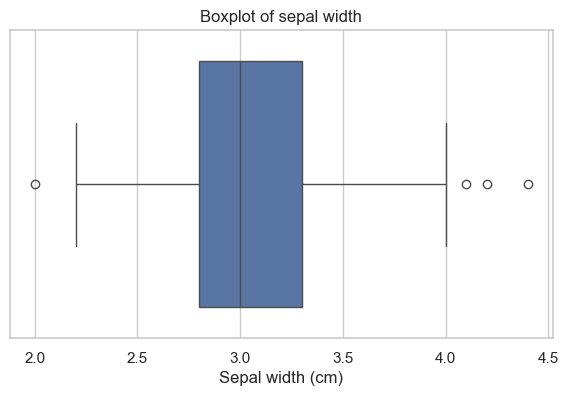

Mean = 3.057, Median = 3.000


In [25]:
y = df_iris['sepal width (cm)']

fig, ax = plt.subplots()
sns.boxplot(x=y, ax=ax)
ax.set_title("Boxplot of sepal width")
ax.set_xlabel("Sepal width (cm)")
plt.show()

mean_val = y.mean()
median_val = y.median()
print(f"Mean = {mean_val:.3f}, Median = {median_val:.3f}")

# TODO: Manually add an outlier (e.g., append value 8 or 0) and recompute mean/median to see the effect.

## (5) ECDF (Empirical CDF)
**Task:** Implement ECDF and plot it for *sepal length* (overall and by species).

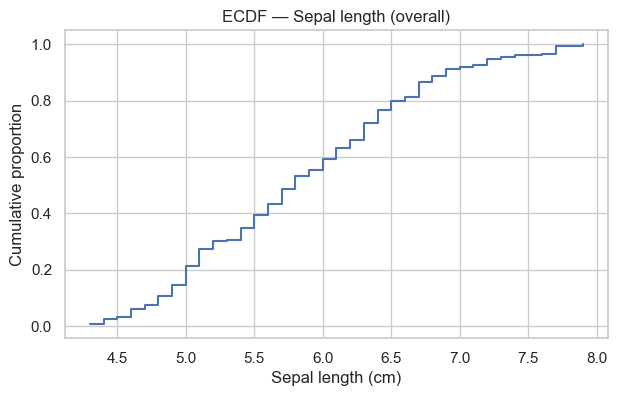

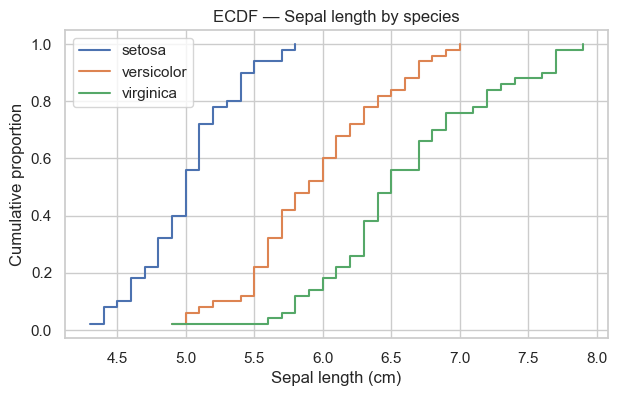

In [26]:
def ecdf(arr):
    arr = np.asarray(arr)
    x = np.sort(arr)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

# Overall ECDF
x_ecdf, y_ecdf = ecdf(??)

plt.step(x_ecdf, y_ecdf, where='post')
plt.title("ECDF — Sepal length (overall)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Cumulative proportion")
plt.show()

# ECDF by species
plt.figure(figsize=(7,4))
for sp, g in df_iris.groupby('species'):
    xs, ys = ecdf(??)
    plt.step(xs, ys, where='post', label=sp)
plt.title("ECDF — Sepal length by species")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Cumulative proportion")
plt.legend()
plt.show()


## 6) Facet Plots
**Task:** Use facets to compare the distribution across species. Try `sns.displot` (histogram) or `sns.catplot`.

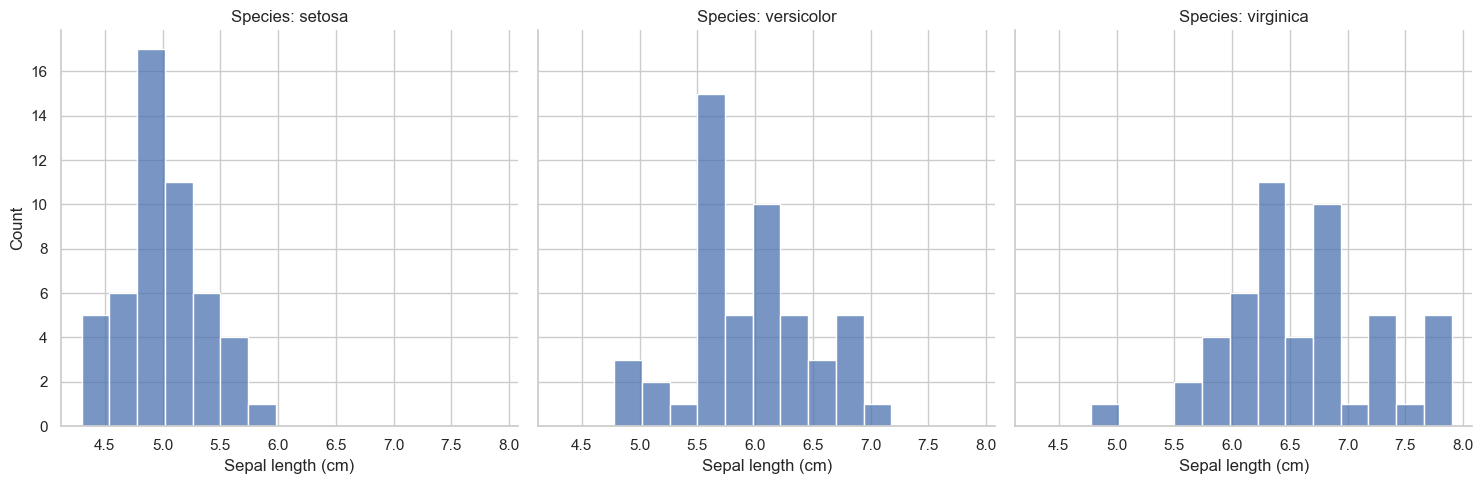

In [27]:
g = sns.displot(df_iris, x='sepal length (cm)', col='species', bins=15)
g.set_titles("Species: {col_name}")
g.set_axis_labels("Sepal length (cm)", "Count")
plt.show()


## (Bonus) Synthetic Flight Delays — Histogram vs KDE
**Task:** Generate a realistic synthetic delay distribution and compare histogram vs KDE/overlay.

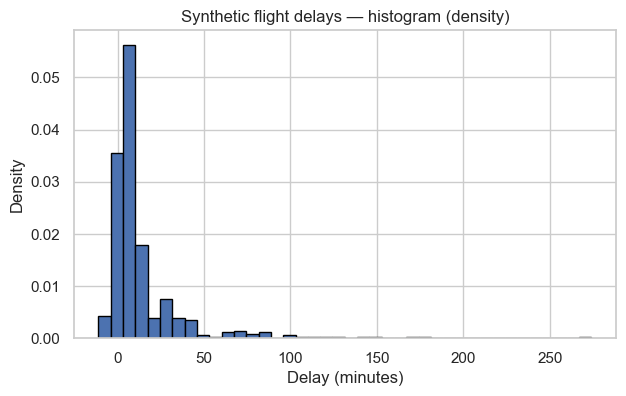

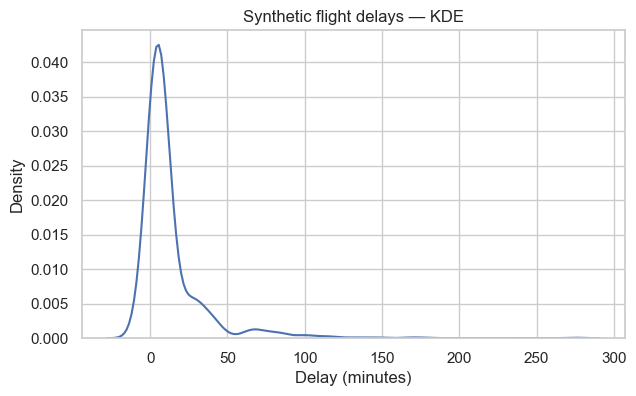

In [31]:
np.random.seed(123)
small_delays = np.random.normal(loc=5, scale=5, size=800)
small_delays = np.clip(small_delays, -20, 20)
moderate_delays = np.random.normal(loc=30, scale=10, size=150)
long_delays = np.random.exponential(scale=30, size=50) + 60
delays = np.concatenate([small_delays, moderate_delays, long_delays])

# Histogram (density)
plt.hist(delays, bins=40, edgecolor='black', density=True)
plt.title("Synthetic flight delays — histogram (density)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Density")
plt.show()

# KDE overlay
sns.kdeplot(x=delays)
plt.title("Synthetic flight delays — KDE")
plt.xlabel("Delay (minutes)")
plt.ylabel("Density")
plt.show()

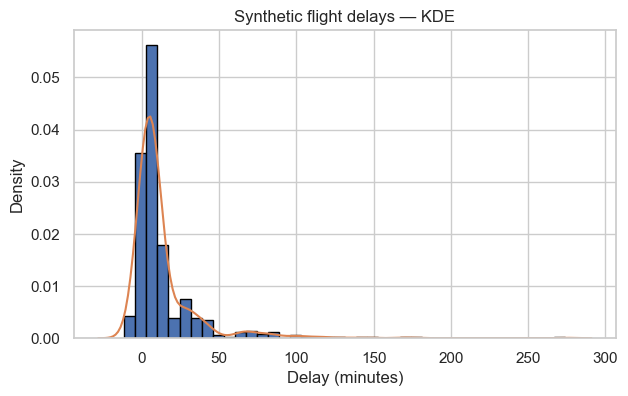

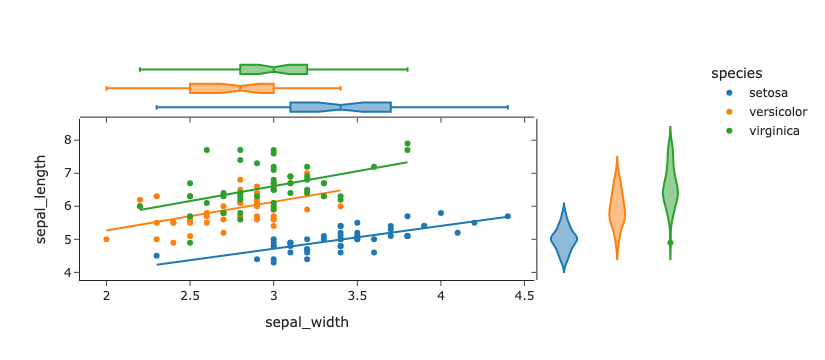

In [29]:
import plotly.express as px
import plotly.io as pio
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", 
                 marginal_y="violin", marginal_x="box", 
                 trendline="ols", template="simple_white")
fig.show()

---
### Wrap-Up Prompts
- Which visualization was most informative for this dataset, and why?
- How did bin size and bandwidth change your interpretation?
- When would you prefer ECDF over histogram/KDE?
